<a href="https://colab.research.google.com/github/Kazuyasus/Econometrics/blob/main/11th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install --upgrade pip
!pip install linearmodels
from linearmodels.panel import PanelOLS, FirstDifferenceOLS, RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.2 MB/s eta 0:00:00


In [ ]:
# GitHubのdataを利用
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/cig.csv"

# CSVを読み込む
cig = pd.read_csv(url)

# パネルデータの設定
cig = cig.set_index(["id", "t"])

cig.head()



income  life   ncig
id t                     
1  1   300.0     2   0.00
   2   300.0     2   2.75
2  1   300.0     2   7.75
   2   300.0     3  10.50
3  1    50.0     4   0.00

<ipython-input-4-bf547178d214>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='t', y='income', data=cig, ci=95)


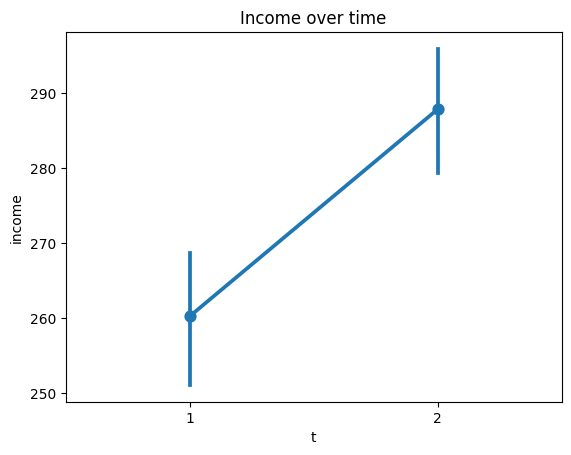

In [ ]:
# 平均値と95%信頼区間のプロット (2時点のincomeの変化)
sns.pointplot(x='t', y='income', data=cig, ci=95)
plt.title("Income over time")
plt.show()


<ipython-input-5-67b2c10d7975>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='t', y='ncig', data=cig, ci=95)


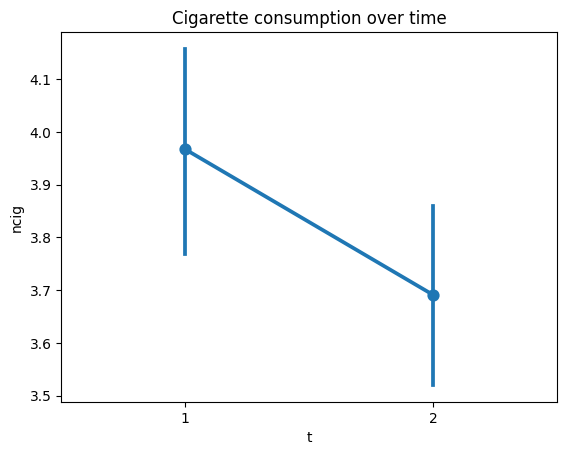

In [ ]:
# 平均値と95%信頼区間のプロット (2時点のNcigの変化)
sns.pointplot(x='t', y='ncig', data=cig, ci=95)
plt.title("Cigarette consumption over time")
plt.show()


In [ ]:
# Q1: OLS 回帰
#t=1期目（2007年）のデータを使って最小2乗法で回帰
reg1 = smf.ols("ncig ~ life", data=cig.query("t == 1")).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                   ncig   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     44.77
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.63e-11
Time:                        05:55:46   Log-Likelihood:                -9331.4
No. Observations:                3022   AIC:                         1.867e+04
Df Residuals:                    3020   BIC:                         1.868e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7368      0.282     20.374      0.0

In [ ]:
#t=2期目（2009年）のデータを使って最小2乗法で回帰
reg2 = smf.ols("ncig ~ life", data=cig.query("t == 2")).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   ncig   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     28.79
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           8.67e-08
Time:                        05:55:49   Log-Likelihood:                -9115.6
No. Observations:                3022   AIC:                         1.824e+04
Df Residuals:                    3020   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0725      0.273     18.601      0.0

In [ ]:
# 一階差分法 説明変数 lifeのみ
#　FirstDifferenceOLS は、linearmodels.panel モジュールにある「パネルデータの一階差分回帰モデル」
plreg1 = FirstDifferenceOLS.from_formula("ncig ~ life", data=cig).fit()
print(plreg1.summary)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                   ncig   R-squared:                        0.0023
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.1810
No. Observations:                3022   R-squared (Within):               0.0023
Date:                Thu, Mar 27 2025   R-squared (Overall):             -0.1495
Time:                        05:55:52   Log-likelihood                   -9340.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.8376
Entities:                        3022   P-value                           0.0090
Avg Obs:                       2.0000   Distribution:                  F(1,3021)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             6.8376
                            

In [ ]:
# 一階差分法 説明変数 life + income
plreg2 = FirstDifferenceOLS.from_formula("ncig ~ life + income", data=cig).fit()
print(plreg2.summary)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                   ncig   R-squared:                        0.0101
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.0492
No. Observations:                3022   R-squared (Within):               0.0101
Date:                Thu, Mar 27 2025   R-squared (Overall):              0.0425
Time:                        05:55:56   Log-likelihood                   -9328.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      15.394
Entities:                        3022   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                  F(2,3020)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             15.394
                            

In [ ]:
#Q2
# GitHubのdataを利用
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/life.csv"

# CSVを読み込む
life = pd.read_csv(url)

# パネルデータの設定
life = life.set_index(["id", "t"])

life.head()

income  life  shock  y2  shock_y2
id t                                   
1  1   300.0     3      0   0         0
   2   300.0     1      0   1         0
2  1   300.0     3      1   0         0
   2   300.0     4      1   1         1
3  1    50.0     3      1   0         0

In [ ]:
#①t=2期目のデータを使って最小2乗法
reg3 = smf.ols("life ~ shock + income", data=life.query("t == 2")).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     14.99
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.31e-07
Time:                        05:56:03   Log-Likelihood:                -4078.2
No. Observations:                3020   AIC:                             8162.
Df Residuals:                    3017   BIC:                             8180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6737      0.031     87.575      0.0

In [ ]:
#②1階差分方程式
# .groupby("id")：個人（または地域など）のIDごとにグループ化
# ['life'].diff()：各IDごとに life 列の 前時点との差分 を計算
# D_life 列として新たに保存（D = Difference の略）
# D_income 列として新たに保存（D = Difference の略）
life['D_life'] = life.groupby("id")['life'].diff()
life['D_income'] = life.groupby("id")['income'].diff()

preg1 = smf.ols("D_life ~ shock + D_income", data=life.dropna()).fit()
print(preg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_life   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.197
Date:                Thu, 27 Mar 2025   Prob (F-statistic):            0.00558
Time:                        05:56:05   Log-Likelihood:                -5096.6
No. Observations:                3020   AIC:                         1.020e+04
Df Residuals:                    3017   BIC:                         1.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2154      0.031      6.869      0.0

In [ ]:
#Q3
#プーリングOLS
#差の差の推定量
pols = PanelOLS.from_formula("life ~ shock + y2 + shock_y2 + income", data=life).fit()
print(pols.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   life   R-squared:                        0.7186
Estimator:                   PanelOLS   R-squared (Between):              0.8294
No. Observations:                6040   R-squared (Within):              -1.1472
Date:                Thu, Mar 27 2025   R-squared (Overall):              0.7186
Time:                        05:56:09   Log-likelihood                -1.094e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3853.9
Entities:                        3020   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                  F(4,6036)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             3853.9
                            

In [ ]:
#固定効果モデル（within: Fixed Effect）
#fe = PanelOLS.from_formula("life ~ y2 + shock_y2 + income + EntityEffects", data=life).fit()  ではErrorとなる
# shockは2か年ども同じ変数となっており、個体ごとで変動がないため、モデルに含めることができない状態になっている。
# そのような説明変数をモデルに含めないようにするため、drop_absorbed=Trueを実行する

# PanelOLS は、linearmodels.panel モジュールの関数 パネルデータ分析（固定効果・ランダム効果など）を行うためのクラス
# from_formula(...) は、Rのような式形式でモデルを記述できる便利な構文
fe = PanelOLS.from_formula("life ~ y2 + shock_y2 + income + EntityEffects",
                           data=life, drop_absorbed=True).fit()
print(fe.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   life   R-squared:                        0.0188
Estimator:                   PanelOLS   R-squared (Between):              0.0982
No. Observations:                6040   R-squared (Within):               0.0188
Date:                Thu, Mar 27 2025   R-squared (Overall):              0.0938
Time:                        06:47:42   Log-likelihood                   -6006.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.315
Entities:                        3020   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                  F(3,3017)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             19.315
                            

In [ ]:
# 個別効果の推定
mu = fe.estimated_effects
print(mu)

        estimated_effects
id   t                   
1    1           1.825332
     2           1.825332
2    1           3.395391
     2           3.395391
3    1           2.423301
...                   ...
3018 2           2.917719
3019 1           2.412137
     2           2.412137
3020 1           2.336496
     2           2.336496

[6040 rows x 1 columns]


In [ ]:
# 個別効果の平均値
print(mu.mean())

estimated_effects    2.481525
dtype: float64


In [ ]:
#########################################################################
#Q4
#変量効果モデル（Random Effect）
# RandomEffects は、変量効果モデル（REモデル）を行うためのクラス
re = RandomEffects.from_formula("life ~ 1 + shock + y2 + shock_y2 + income", data=life).fit()
print(re.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   life   R-squared:                        0.0156
Estimator:              RandomEffects   R-squared (Between):              0.0124
No. Observations:                6040   R-squared (Within):               0.0188
Date:                Thu, Mar 27 2025   R-squared (Overall):              0.0155
Time:                        05:56:42   Log-likelihood                   -8099.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.908
Entities:                        3020   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                  F(4,6035)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             23.908
                            

In [ ]:
from linearmodels.panel import compare
comparison = compare({'Pooling OLS': pols, 'Fixed Effects': fe})
print(comparison)

                   Model Comparison                  
                           Pooling OLS  Fixed Effects
-----------------------------------------------------
Dep. Variable                     life           life
Estimator                     PanelOLS       PanelOLS
No. Observations                  6040           6040
Cov. Est.                   Unadjusted     Unadjusted
R-squared                       0.7186         0.0188
R-Squared (Within)             -1.1472         0.0188
R-Squared (Between)             0.8294         0.0982
R-Squared (Overall)             0.7186         0.0938
F-statistic                     3853.9         19.315
P-value (F-stat)                0.0000         0.0000
=====================     ============   ============
shock                           1.8409               
                              (40.465)               
y2                              1.9276         0.2154
                              (47.611)       (6.8686)
shock_y2                    

In [ ]:
# 3つの検定は実装されていない
# ①Pooling OLS VS Fixed Effect Model 　　F test
# ②Pooling OLS VS Random Effect Model    Breausch Pagan test
# ③ Fixed Effect Model VS Random Effect Model  Hausman test
# 以下、代替分析案になります。　ただし、R、Stataと同じ推計結果が得られません。

In [ ]:
#Pooling OLS VS Fixed Effect Model
#帰無仮説 H0 : μ1 = μ2 = … = μN (全ての個別効果が同じ値である)個体特融効果はない
#F検定によって行う。
print(fe.f_pooled)
#0.011　帰無仮説が棄却されるので、固定効果モデルが採択

# Rの結果と一致しない



Pooled F-statistic
H0: Effects are zero
Statistic: 1.0864
P-value: 0.0115
Distributed: F(3019,3017)


NameError: name 'size' is not defined

In [ ]:
#Pooling OLS VS Random　Effect Model
#Breusch-Pagan検定
#plmtest(re, "individual", "bp")
#p-value < 0.1 →帰無仮説(μiの分散がゼロ)が棄却→変量効果モデルを採択

# 個体数 n と時点数 T
n = len(life.index.levels[0])
T = len(life.index.levels[1])

# D: 個体ダミー行列、e: Pooled OLS の残差
# np.kron() は Kronecker積
# np.eye(n) は n×n の単位行列（各個体の識別用）
# np.ones(T) は T個の1（各個体にT期間あることを表す）
D = np.kron(np.eye(n), np.ones(T)).T  # D: (n*T) × n 行列

# 残差ベクトル
e = pols.resids.values

# LM統計量の計算
numerator = (e @ D @ D.T @ e) / (e @ e) - 1
LM = (numerator ** 2) * n * T / (2 * (T - 1))

# p値の計算（自由度1のカイ二乗）
LM_pvalue = stats.chi2.sf(LM, df=1)

# 結果の表示
print(f"LM test: chi-sq = {LM:.4f}, df = 1, p-value = {LM_pvalue:.4f}")

# Rの結果と一致しない


LM test: chi-sq = 63.1663, df = 1, p-value = 0.0000


In [ ]:
#Fixed Effect VS Random Effect
#帰無仮説は個別効果と説明変数の間に相関がない
#Hausman検定
# p-value > 0.1 →　帰無仮説が棄却できない　→変量効果を採択
# p-value < 0.1 →　帰無仮説が棄却できる　　→固定効果を採択

# パラメータと共分散行列を抽出
fe_params = fe.params
re_params = re.params[1:]  # Intercept を除外
fe_cov = fe.cov
re_cov = re.cov.iloc[1:, 1:]  # Intercept を除外

# 差と分散差
diff = fe_params - re_params
psi = fe_cov - re_cov

# 数値安定化のための微小正則化（必要なら）
epsilon = 1e-6
psi += np.eye(len(psi)) * epsilon

# Hausman統計量
W = diff.T @ np.linalg.inv(psi) @ diff
dof = len(diff)
pvalue = stats.chi2(dof).sf(W)

# 結果表示
print(f"Hausman Test: chi-sq = {W:.4f}, df = {dof}, p-value = {pvalue:.4f}")


Hausman Test: chi-sq = nan, df = 4, p-value = nan


In [ ]:
try:
    # 微小正則化を入れる（数値安定化）
    epsilon = 1e-6
    psi_reg = psi + np.eye(len(psi)) * epsilon

    # 統計量計算
    W = float(diff.T @ np.linalg.inv(psi_reg) @ diff)
    dof = len(diff)
    pvalue = float(stats.chi2(dof).sf(W))

    if np.isnan(W) or np.isnan(pvalue):
        print(f"Hausman Test: chi-sq = {W}, df = {dof}, p-value = {pvalue}")
    else:
        print(f"Hausman Test: chi-sq = {W:.4f}, df = {dof}, p-value = {pvalue:.4f}")

except Exception as e:
    print("❌ Hausman test failed:", e)

Hausman Test: chi-sq = nan, df = 4, p-value = nan


In [ ]:
if np.isnan(W) or np.isnan(pvalue):
    print("⚠️ Hausman統計量がNaNです。FEとREの推定値が非常に近い可能性があります。")
    print("→ モデルに違いがないため、検定の意味が薄いです。REモデルで問題ないか検討を。")
else:
    print(f"Hausman Test: chi-sq = {W:.4f}, df = {dof}, p-value = {pvalue:.4f}")

⚠️ Hausman統計量がNaNです。FEとREの推定値が非常に近い可能性があります。
→ モデルに違いがないため、検定の意味が薄いです。REモデルで問題ないか検討を。
